# Main Notebook for Analyses 

© Jacob T. Fisher & Frederic R. Hopp

Media Neuroscience Lab 

November 2017 

In [51]:
import numpy as np
import pickle
import pandas as pd 
import scipy as scp

from sklearn.preprocessing import Imputer,StandardScaler
from sklearn.cross_validation import train_test_split, StratifiedKFold, cross_val_score

from sklearn.decomposition import PCA 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier

from matplotlib import pyplot as plt 
import seaborn as sns
from ggplot import *
from variables import *
#from utils import clean_themes

pd.options.display.max_columns = 200
pd.options.display.max_rows = 200

#### Data Ingest

In [2]:
GKG_PATH_FRH = '/mnt/gdelt/datamining/gkg_final_data.json'

In [3]:
df = pd.read_json(GKG_PATH_FRH)

In [4]:
# Reorder columns to have label col at the end
df = df.set_index('date')
label = df['ptx_label']
df.drop(labels=['ptx_label'], axis=1,inplace = True)
df.insert(254, 'ptx_label', label)

In [8]:
df = df.reset_index()

#### Explorative Data Analysis 

As you suggested, maybe we start of with some very basic plottings to get a better sense of how the data looks like...

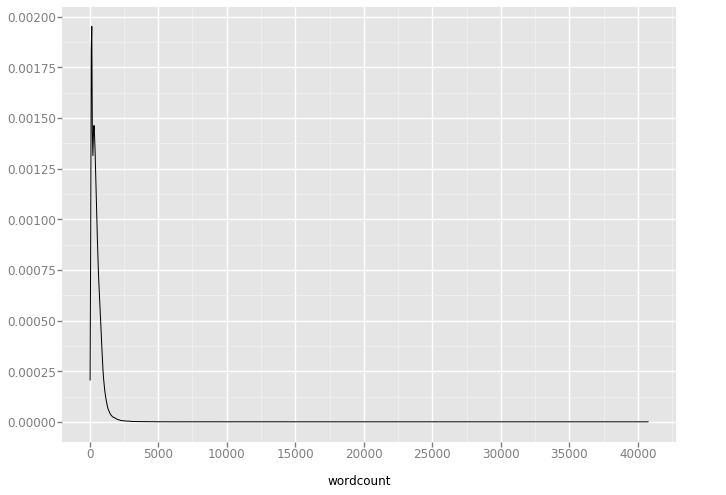

<ggplot: (-9223363285840940435)>

In [29]:
ggplot(aes(x='wordcount'), data=df) + \
    geom_density() 

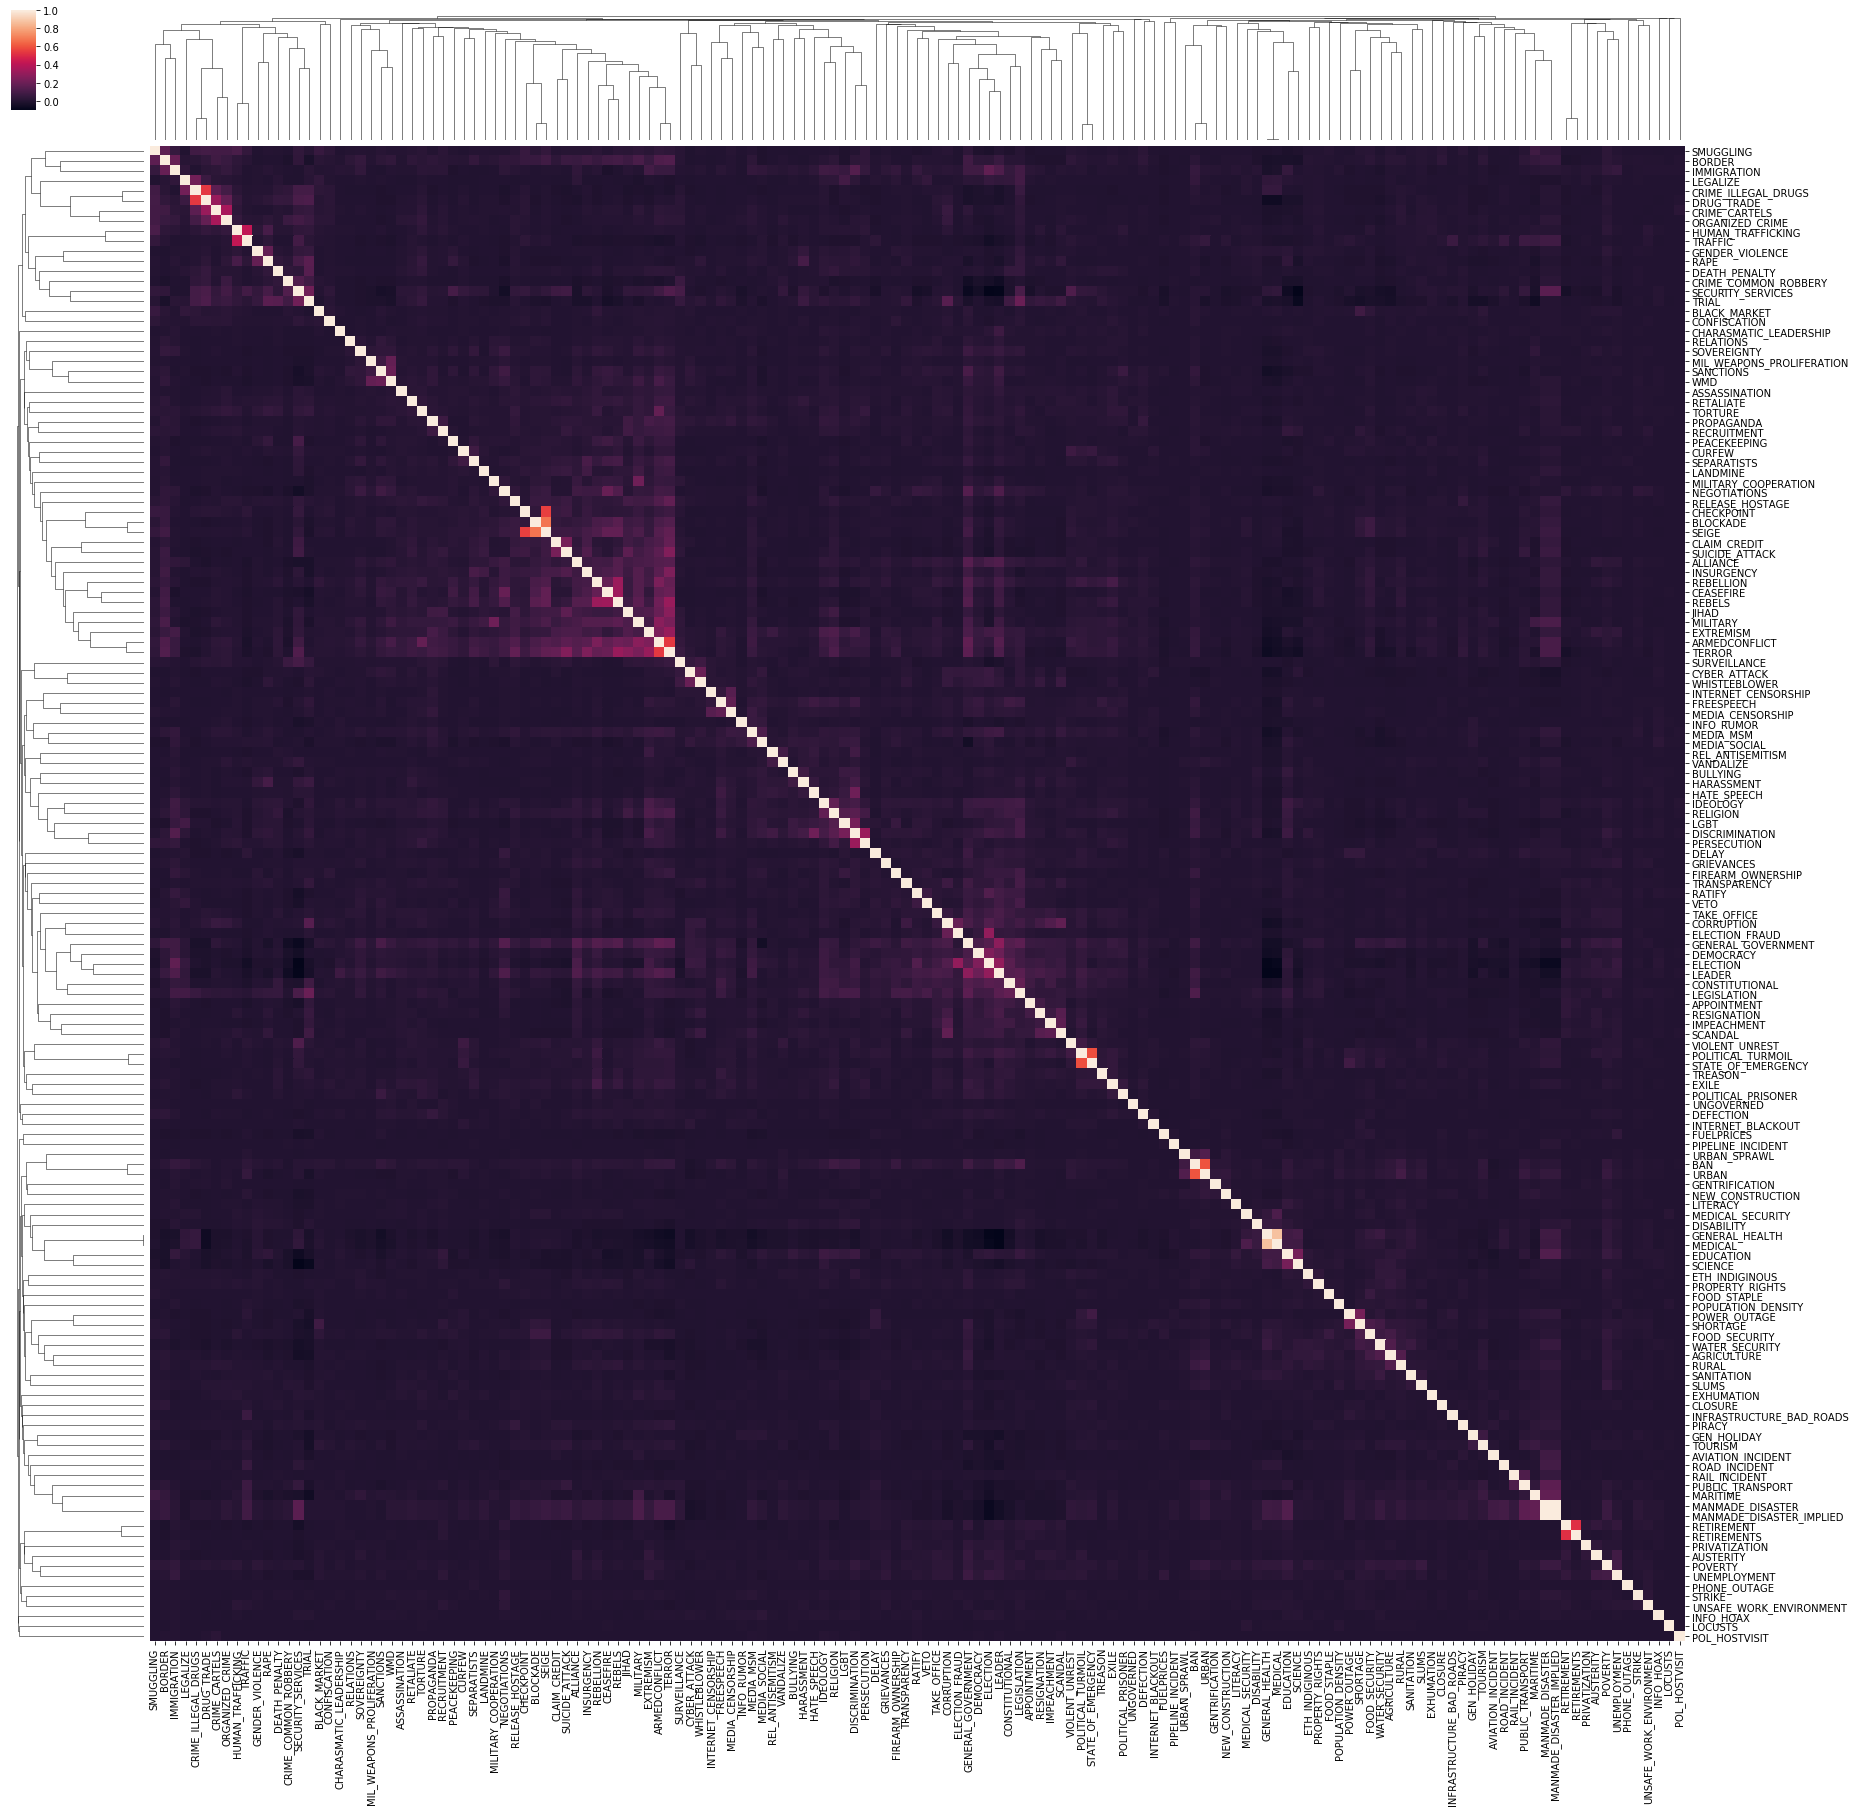

In [128]:
# Correlation Matrix / Heatmap of themes
plt.close("all")
corr_themes = df[themes].corr().dropna(how='all')
corr_themes = corr_themes.dropna(how='any', axis=1)

# TODO: Figure out how to color the clusters correctly for better visual interpretation?
# Probably have to visually extract clusters...no str8forward way found. 

sns.clustermap(corr_themes, metric='correlation',figsize=(30,30))
#plt.tight_layout()
plt.show()
clusters = sns.clustermap(corr_themes, metric='correlation',figsize=(30,30)).dendrogram_row.reordered_ind

In [100]:
cluster_themes = pd.DataFrame(corr_themes.columns)

In [103]:
cluster_themes.reindex(clusters)

,0
124,SMUGGLING
10,BORDER
54,IMMIGRATION
65,LEGALIZE
22,CRIME_ILLEGAL_DRUGS
31,DRUG_TRADE
20,CRIME_CARTELS
83,ORGANIZED_CRIME
52,HUMAN_TRAFFICKING
134,TRAFFIC


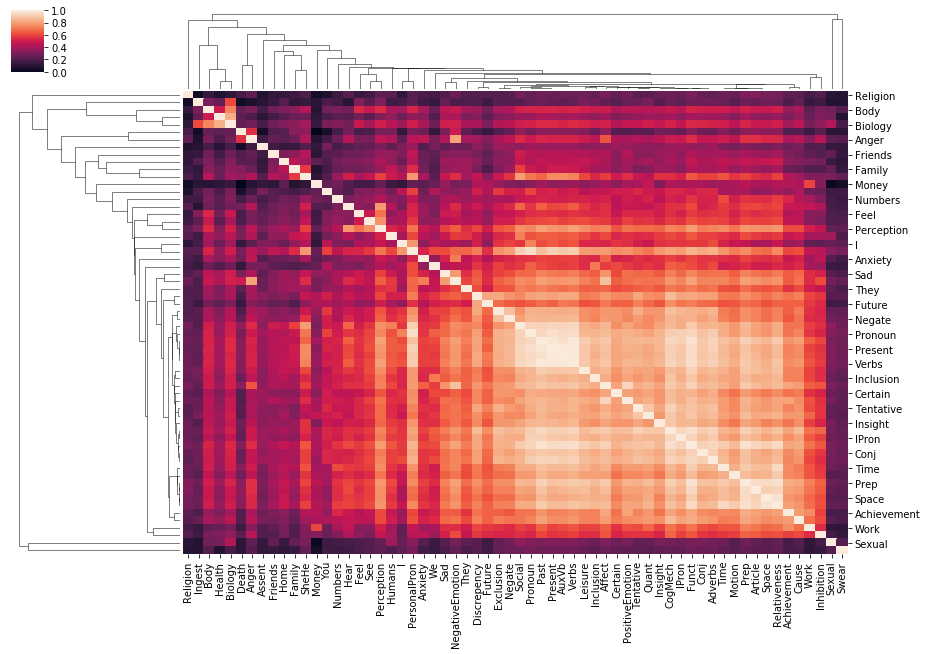

In [116]:
plt.close("all")
corr_liwc_names = df[liwc_names].corr().dropna(how='all')
corr_liwc_names = corr_liwc_names.dropna(how='any', axis=1)

# TODO: Figure out how to color the clusters correctly for better visual interpretation

sns.clustermap(corr_liwc_names, metric='correlation',figsize=(15,10))
#plt.tight_layout()
plt.show()
clusters = sns.clustermap(corr_liwc_names, metric='correlation',figsize=(15,10)).dendrogram_row.reordered_ind

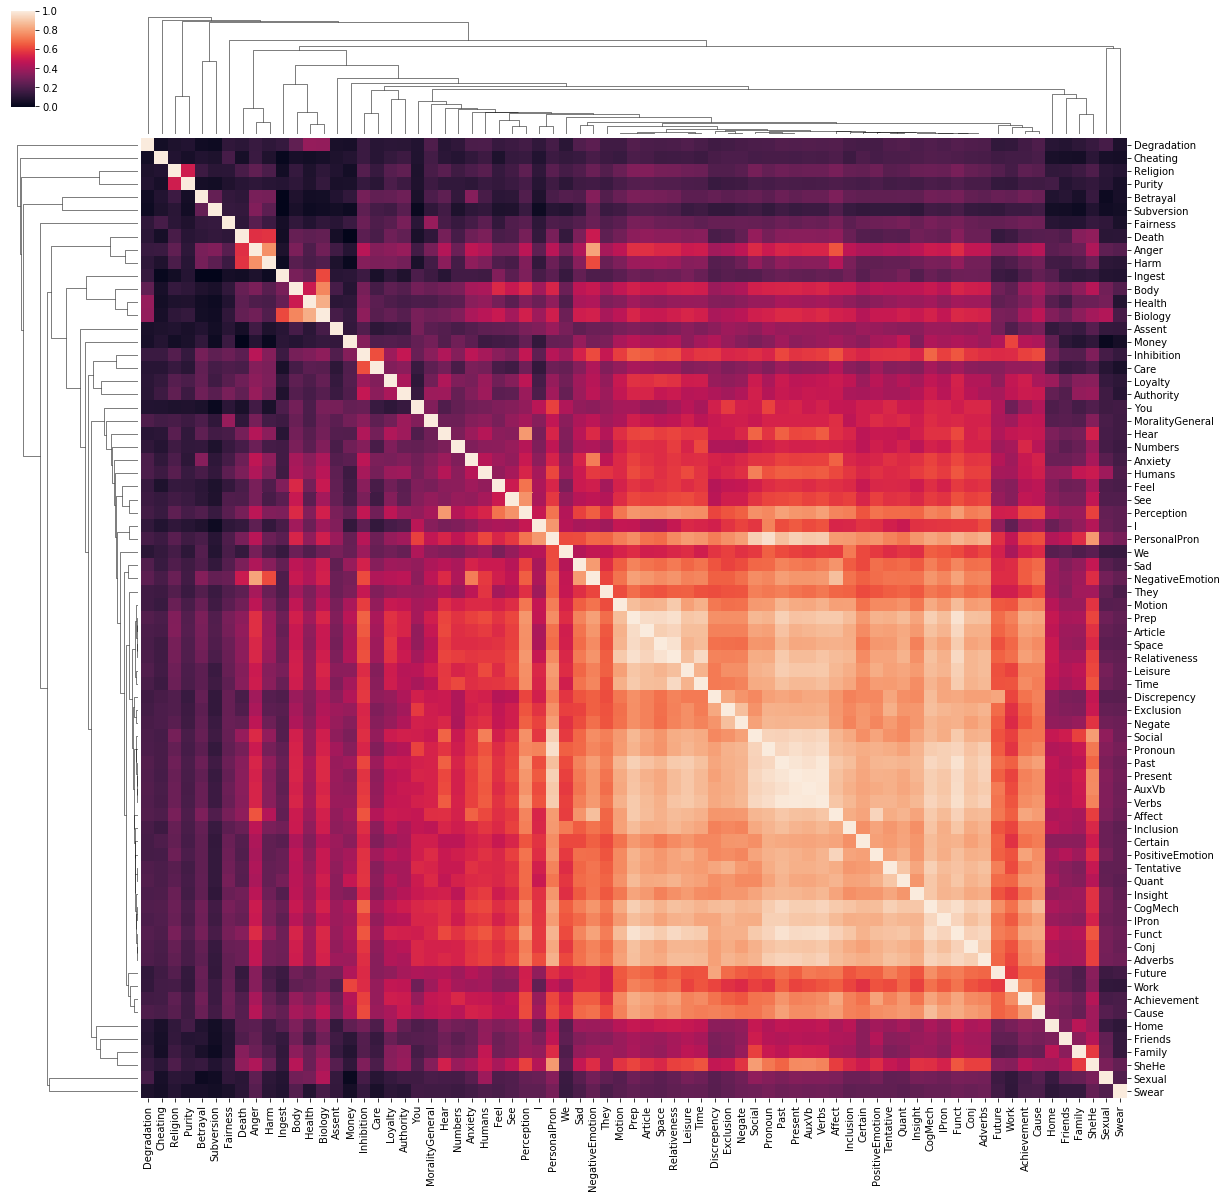

In [127]:
plt.close("all")
combined = list(liwc_names) + list(mft_names)
corr_mit_names = df[combined].corr().dropna(how='all')
corr_mit_names = corr_mit_names.dropna(how='any', axis=1)

# TODO: Figure out how to color the clusters correctly for better visual interpretation

sns.clustermap(corr_mit_names, metric='correlation',figsize=(20,20))
#plt.tight_layout()
plt.show()
clusters = sns.clustermap(corr_mit_names, metric='correlation',figsize=(30,30)).dendrogram_row.reordered_ind

## Start Analysis here

#### Train-Test Split

In [8]:
# Reorder columns to have label col at the end
label = df['ptx_label']
df.drop(labels=['ptx_label'], axis=1,inplace = True)
df.insert(254, 'ptx_label', label)

In [49]:
X, y = df.iloc[:,0:253].values, df.iloc[:,254].values # gets feature matrix and class labels 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### Standardizing Features

In [50]:
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.fit_transform(X_test)

#### PCA for Dimension Reduction 

In [58]:
cov_mat = np.cov(X_train_std.T) #covariance matrix
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat) #eigendecomposition 

tot = sum(eigen_vals)
var_exp = [(i / tot) for i in 
          sorted(eigen_vals, reverse=True)] # need to sort eigen_vals to obtain largest to smalled 
cum_var_exp = np.cumsum(var_exp)

/Users/Wasp/anaconda3/lib/python3.5/site-packages/matplotlib/patches.py:693: ComplexWarning: Casting complex values to real discards the imaginary part
  self._height = float(height)
/Users/Wasp/anaconda3/lib/python3.5/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


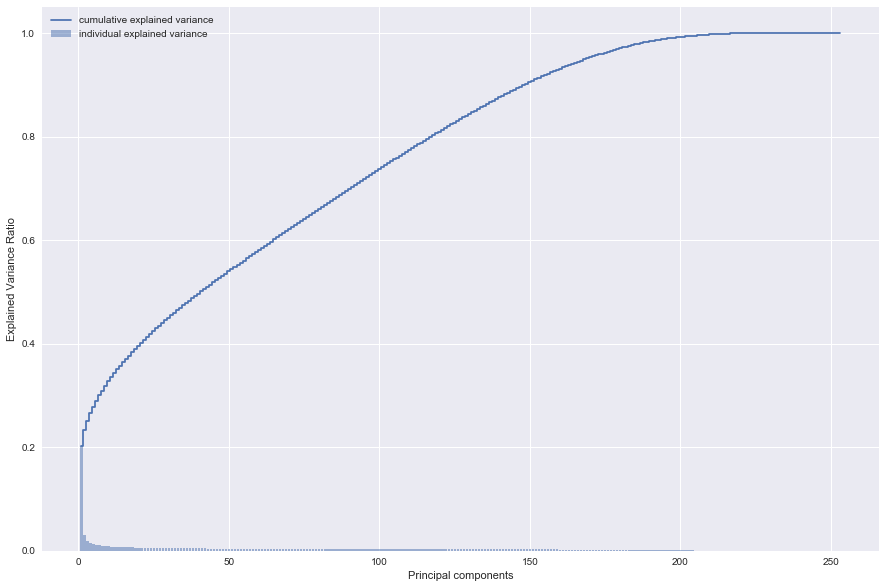

In [62]:
# Plot explained variance against PC
plt.figure(figsize=(15,10))
plt.bar(range(1,254), var_exp, alpha=0.5, align='center',
        label='individual explained variance')

plt.step(range(1,254), cum_var_exp, where='mid',
        label='cumulative explained variance')

plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

First two PC account for 54% of explained variance

In [120]:
# Plot class labels onto the first two PC:
# Start by sorting the eigenvals again
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]

# Select two largest eigenvecs:
w = np.hstack((eigen_pairs[1][1][:, np.newaxis], # change indices to select different eigenvectors 
              eigen_pairs[3][1][:, np.newaxis])) # change indices to select different eigenvectors

X_train_pca = X_train_std.dot(w)

/Users/Wasp/anaconda3/lib/python3.5/site-packages/numpy/core/numeric.py:583: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


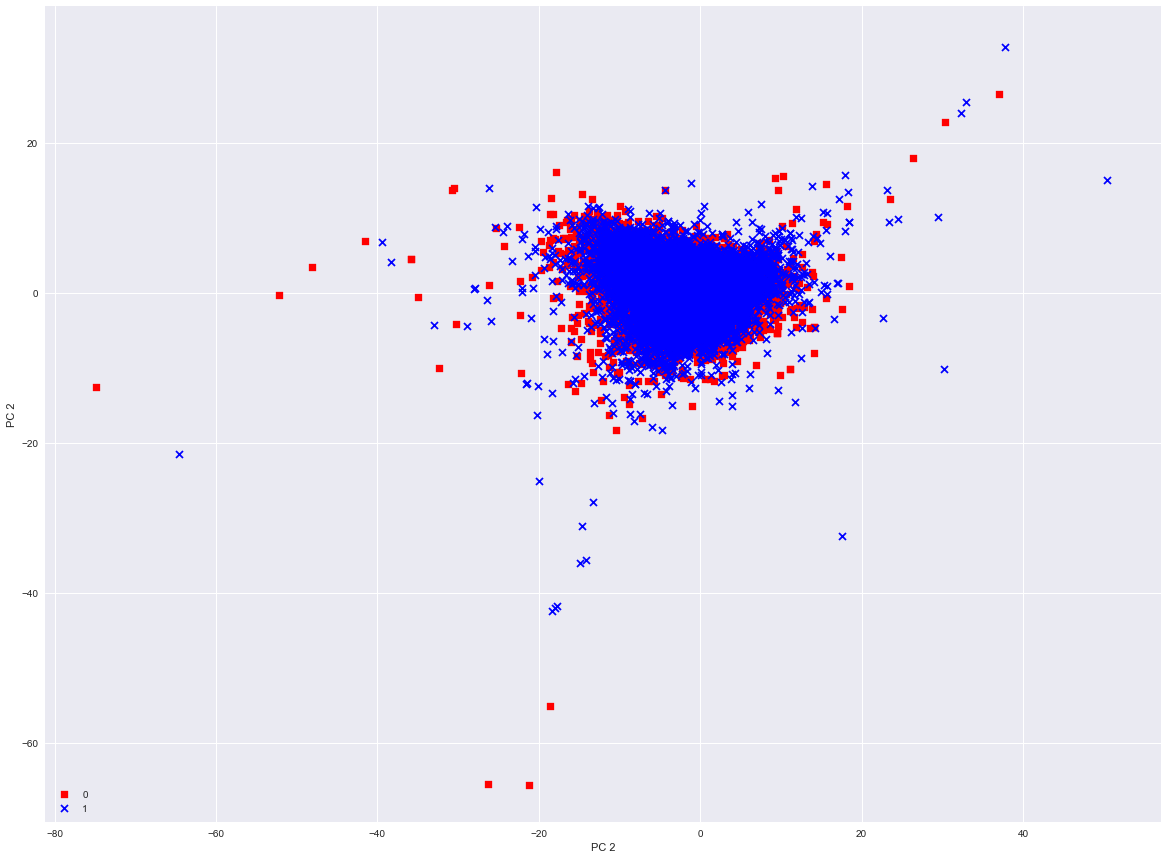

In [121]:
colors = ['r', 'b']
markers = ['s','x']

plt.figure(figsize=(20,15))

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0],
               X_train_pca[y_train==l, 1],
               c=c, label=l, marker=m)

plt.xlabel('PC 2')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

Looks like we need to rely on some non-linear (SVM) to discriminate here

#### Assessing Feature Importance w/ Random Forests

In [9]:
forest = RandomForestClassifier(n_estimators = 10000, random_state=0,n_jobs=-1)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10000, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [10]:
feat_labels = df.columns[0:102]
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[f],
                           importances[indices[f]]))

 1) Attitude                       0.357405
 2) Emotion-Eliciting Situation    0.015091
 3) Trait                          0.013609
 4) Behaviour                      0.013314
 5) Cognitive State                0.012408
 6) Edonic Signal                  0.011075
 7) Emotion                        0.010354
 8) Mood                           0.010300
 9) Physical State                 0.009906
10) Emotional Response             0.009874
11) Sensation                      0.009794
12) Care                           0.009762
13) Degradation                    0.009585
14) MoralityGeneral                0.009474
15) Harm                           0.009340
16) Fairness                       0.009272
17) Cheating                       0.009026
18) Loyalty                        0.009021
19) Betrayal                       0.009015
20) Authority                      0.008994
21) Subversion                     0.008947
22) Purity                         0.008883
23) Assent                      

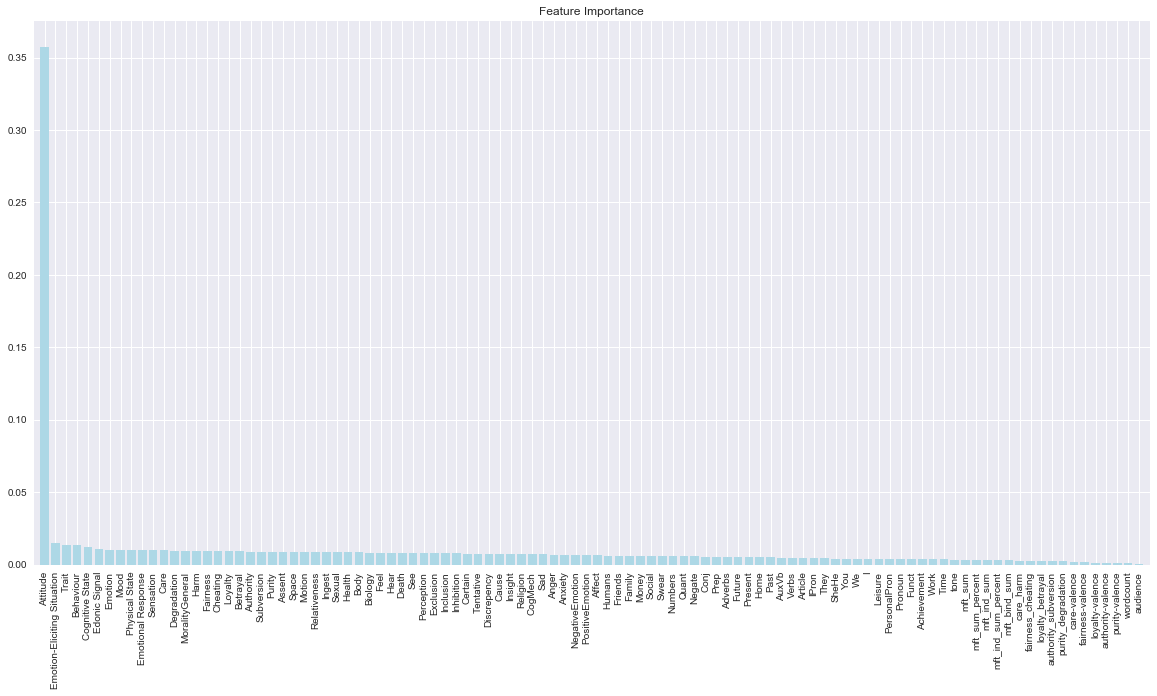

In [12]:
plt.figure(figsize=(20,10))
plt.title('Feature Importance')

plt.bar(range(X_train.shape[1]), 
        importances[indices], 
        color='lightblue',
        align='center')

plt.xticks(range(X_train.shape[1]),
                feat_labels, rotation=90)
           
plt.xlim([-1, X_train.shape[1]])
plt.show()